In [62]:
import numpy as np
from sklearn.linear_model import Perceptron
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# seed
np.random.seed(0)

## Funciones para demostración empírica

In [63]:
"""
    Gamma: retorna el margen
    input:
        X: numpy array (n, d)
        Y: numpy array (n)
    output:
        gamma: float
"""
def gamma(X, Y):
    perceptron = Perceptron(tol=None)
    perceptron.fit(X, Y)
    Y_predicted = perceptron.predict(X)
    gamma = np.inf
    
    for i in range(X.shape[0]):
        if Y[i] * Y_predicted[i] < gamma:
            gamma = Y[i] * Y_predicted[i]
        
    return gamma

"""
    linearly_separable: Verifica si data es linealmente separable
    input:
        X: numpy array (n, d)
        Y: numpy array (n)
    output:
        bool
"""
def linearly_separable(X, Y):
    perceptron = Perceptron(tol=None)
    perceptron.fit(X, Y)
    Y_predicted = perceptron.predict(X)
    
    for i in range(X.shape[0]):
        if Y[i] * Y_predicted[i] <= 0:
            return False
        
    return True

"""
    convert_to_ls: borra elementos que no sirven
    input:
        X: numpy array (n, d)
        Y: numpy array (n)
    output:
        X, Y
"""
def convert_to_ls(X, Y):
    
    perceptron = Perceptron(tol=None)
    perceptron.fit(X, Y)
    Y_predicted = perceptron.predict(X)
    Y=np.array(Y)
    X=np.array(X)
    len_Y = Y.shape[0]
    i = 0
    
    while i < len_Y:
        if Y[i] * Y_predicted[i] <= 0:
 #           print(X.shape)
  #          print(Y.shape)
   #         print(i)
    #        print("\n")            
            Y = np.delete(Y, i,0)
            X = np.delete(X, i,0)
            Y_predicted = np.delete(Y_predicted, i)
            
            len_Y = Y.shape[0]
        else :
            i += 1
    
    return X, Y

"""
    max_norm: calcula la maxima norma de los vectores filas de X,
        donde cada x_i es un vecetor de atributos
    input:
        X: numpy array
    output:
        max_norm_x: float
"""
def max_norm(X):
    max_norm_x = 0
    for x in X:
        if np.linalg.norm(x) >= max_norm_x:
            max_norm_x = np.linalg.norm(x)
    return max_norm_x

# Dataset 1

## Carga data

In [64]:
data = pd.read_csv('datasets/breast-cancer-wisconsin.csv', sep=",")

data.columns = [
    "ID",
    "Clump Thickness",
    "Uniformity of Cell Size",
    "Uniformity of Cell Shape",
    "Marginal Adhesion",
    "Single Epithelial Cell Size",
    "Bare Nuclei",
    "Bland Chromatin",
    "Normal Nucleoli",
    "Mitoses",
    "Result"
]

print("Shape breast cancer wisconsin: ", data.shape)

Shape breast cancer wisconsin:  (698, 11)


## Imputación (borrar nan) y detalles encoding

In [65]:
data = data.drop("ID", axis=1)

data = data.replace(['?'], np.nan)

#imputer = KNNImputer(n_neighbors=5)
print("Cuántos Nan hay?: ", data.isna().sum())
data = data.dropna()
print("Cuántos Nan hay con dropna?: ", data.isna().sum())
print(data)
#data = pd.DataFrame(imputer.fit_transform(data), columns = data.columns)
aux = pd.DataFrame.to_numpy(data)
data = pd.DataFrame(aux, columns = data.columns)

"""data.loc[data['Result'] == "Benign", 'Result'] = 2
data.loc[data['Result'] == "Malignant", 'Result'] = 4
"""

data.loc[data['Result'] == 2, 'Result'] = "Benign"
data.loc[data['Result'] == 4, 'Result'] = "Malignant"

print("Shape breast cancer wisconsin: ", data.shape)

Cuántos Nan hay?:  Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Result                          0
dtype: int64
Cuántos Nan hay con dropna?:  Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Result                         0
dtype: int64
     Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
0                  5                        4                         4   
1                  3                        1                         1   
2                  6          

## Análisis exploratorio

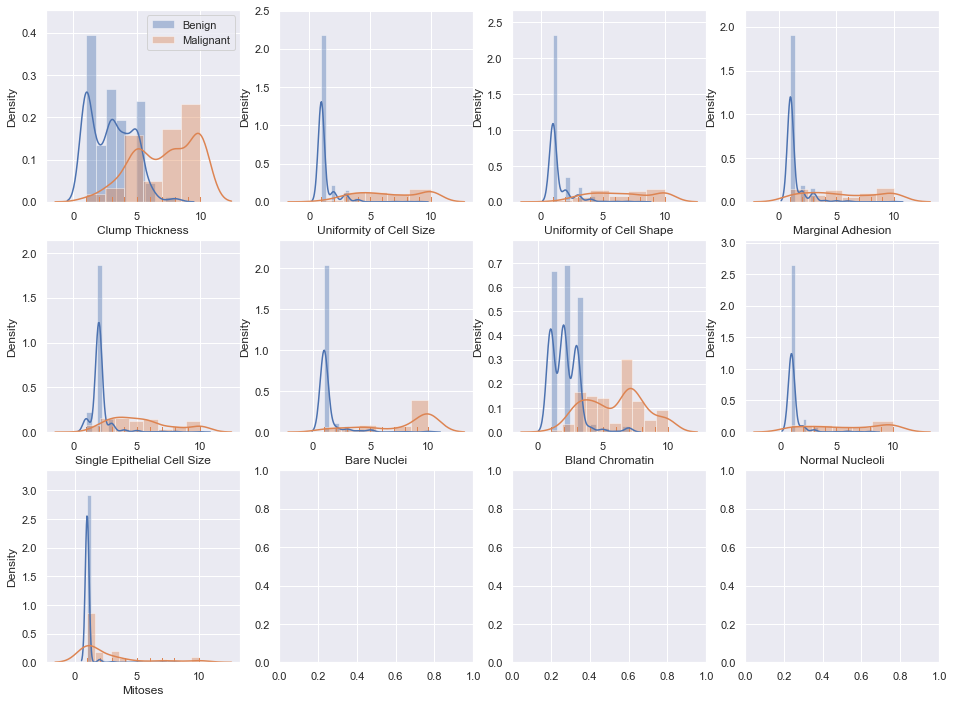

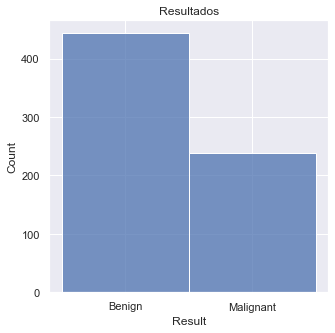

In [66]:
fig, axes = plt.subplots(figsize=(16, 12), nrows=3, ncols=4)

for i, column in enumerate(data.columns[:-1]):
    for result in ["Benign", "Malignant"]:
        target = data.loc[data['Result'] == result]
        sns.distplot(target[column], rug=True, kde=True, ax=axes[i//4,i%4], label=result)
    if i==0:
        axes[0,0].legend()
        
"""data.loc[data['Result'] == "Benign", 'Result'] = 2
data.loc[data['Result'] == "Malignant", 'Result'] = 4"""

fig, ax = plt.subplots(figsize=(5, 5),nrows=1)
sns.histplot(data=data["Result"], palette="Blues_d",ax=ax, label=["Benign", "Malignant"])
ax.set_title('Resultados')
plt.show()

## División data

In [67]:
data.loc[data["Result"] == "Benign" ,"Result"] = 1
data.loc[data["Result"] == "Malignant", "Result"] = -1

data["Result"] = data["Result"].astype(int)

data = data.astype(int)

predictors = data.columns[:-1]
X = data[predictors]
info = data[predictors]

y = data["Result"]

X_train, X_test, y_train, y_test, info_train, info_test = train_test_split(X, y, info, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val, info_train, info_val = train_test_split(X_train, y_train, info_train, test_size=0.2, random_state=0)

X_train_vals = X_train.values; y_train_vals = y_train.values;
X_val_vals = X_val.values; y_val_vals = y_val.values;
X_test_vals = X_test.values; y_test_vals = y_test.values;

## $\gamma$, R y cota

In [68]:
max_norm_dataset_1 = max_norm(X_train_vals)
g = gamma(X_train_vals, y_train_vals)
bound = max_norm_dataset_1**2 / g**2

print("R:", max_norm_dataset_1)
print("Gamma: ", g)
print("Cota: ", bound)
print("Linealmente separables?:", linearly_separable(X_train_vals, y_train_vals))

R: 28.5657137141714
Gamma:  -1
Cota:  816.0000000000001
Linealmente separables?: False


## Perceptrón directo

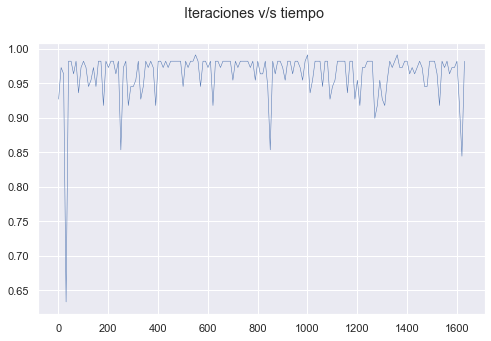

In [69]:
scores = list()
no_iterations = range(1, int(bound*2), 10)

for i in no_iterations:
    perceptron = Perceptron(tol=None, max_iter=i)
    perceptron.fit(X_train_vals, y_train_vals)

    train_acc = perceptron.score(X_train_vals, y_train_vals)
    scores.append(perceptron.score(X_val_vals, y_val_vals))
    test_acc = perceptron.score(X_test_vals, y_test_vals)
    
fig, ax1 = plt.subplots(figsize=(8, 5))

fig.suptitle('Iteraciones v/s tiempo')

ax1.plot(no_iterations, scores, '-', linewidth=0.5)

## Perceptrón con datos linealmente separables

Datos convertidos?: True


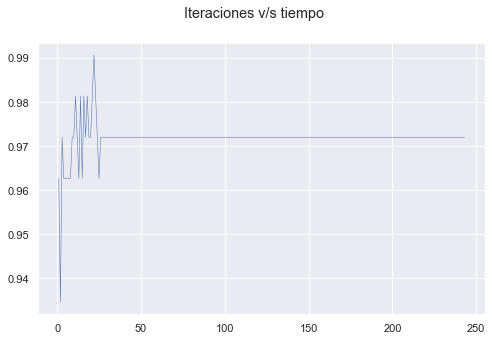

In [71]:
from sklearn.model_selection import train_test_split

predictors = data.columns[:-1]
X = data[predictors]
info = data[predictors]

y = data["Result"]

X, y = convert_to_ls(X, y)
print("Datos convertidos?:", linearly_separable(X, y))

X=pd.DataFrame(X)
y=pd.DataFrame(y)

info = X

X_train, X_test, y_train, y_test, info_train, info_test = train_test_split(X, y, info, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val, info_train, info_val = train_test_split(X_train, y_train, info_train, test_size=0.2, random_state=0)

X_train_vals = X_train.values; y_train_vals = y_train.values;
X_val_vals = X_val.values; y_val_vals = y_val.values;
X_test_vals = X_test.values; y_test_vals = y_test.values;

scores = list()
no_iterations = range(1, int(bound*0.3), 1)

for i in no_iterations:
    perceptron = Perceptron(tol=None, max_iter=i)
    perceptron.fit(X_train_vals, y_train_vals)

    train_acc = perceptron.score(X_train_vals, y_train_vals)
    scores.append(perceptron.score(X_val_vals, y_val_vals))
    test_acc = perceptron.score(X_test_vals, y_test_vals)
    
fig, ax1 = plt.subplots(figsize=(8, 5))

fig.suptitle('Iteraciones v/s tiempo')

ax1.plot(no_iterations, scores, '-', linewidth=0.5)

# Dataset 2

## Carga dataset

In [89]:
data = pd.read_csv('datasets/Skin_NonSkin.txt', sep="\t")
print("Nan?: \n", data.isna().sum())

data.columns = ["B", "G", "R", "SkinNonSkin"]
print("Shape SkinNonSkin: ", data.shape)

Nan?: 
 74     0
85     0
123    0
1      0
dtype: int64
Shape SkinNonSkin:  (245056, 4)


## Análisis exploratorio

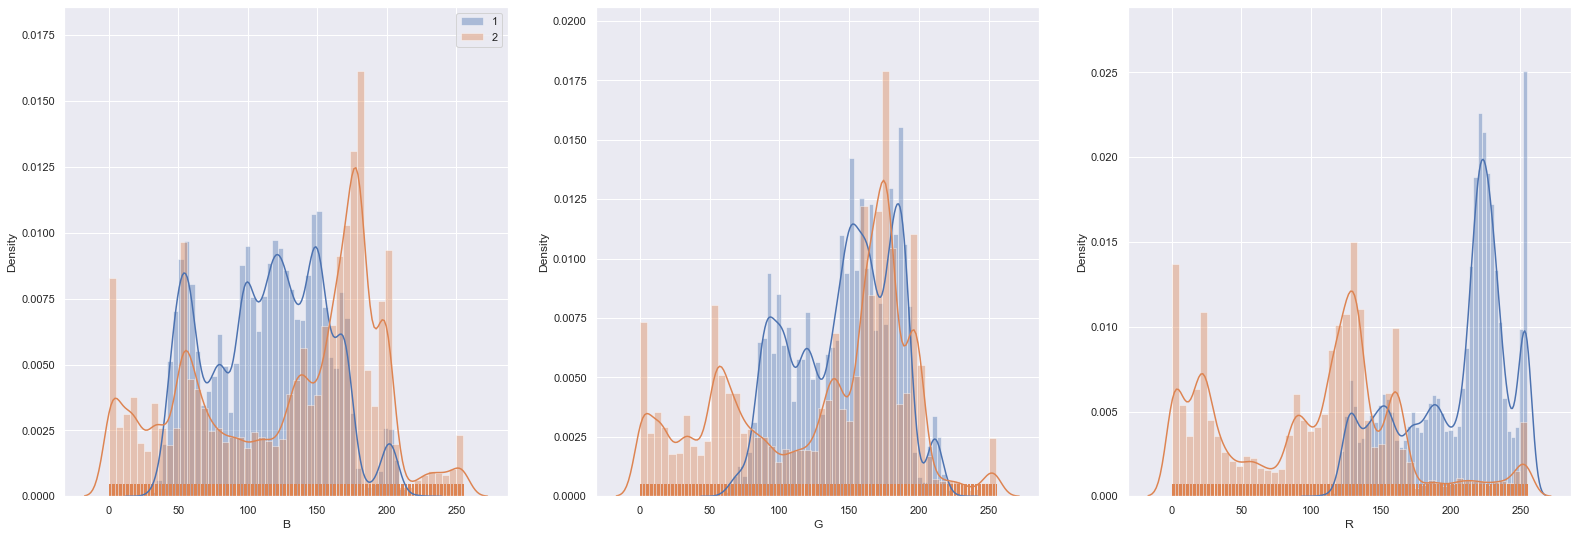

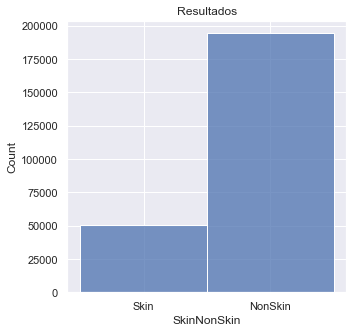

          B    G    R SkinNonSkin
0        73   84  122        Skin
1        72   83  121        Skin
2        70   81  119        Skin
3        70   81  119        Skin
4        69   80  118        Skin
...     ...  ...  ...         ...
245051  163  162  112     NonSkin
245052  163  162  112     NonSkin
245053  163  162  112     NonSkin
245054  163  162  112     NonSkin
245055  255  255  255     NonSkin

[245056 rows x 4 columns]


In [90]:
fig, axes = plt.subplots(figsize=(9*3, 9), nrows=1, ncols=3)

"""data[data["SkinNonSkin"]==1] = "Skin"
data[data["SkinNonSkin"]==2] = "NonSkin" """

for i, column in enumerate(data.columns[:-1]):
    for result in [1, 2]:
        target = data.loc[data['SkinNonSkin'] == result]
        sns.distplot(target[column], rug=True, kde=True, ax=axes[i], label=result)
    if i==0:
        axes[0].legend()

data.loc[data["SkinNonSkin"] == 1, "SkinNonSkin"] = "Skin"
data.loc[data["SkinNonSkin"] == 2, "SkinNonSkin"] = "NonSkin"

fig, ax = plt.subplots(figsize=(5, 5),nrows=1)
sns.histplot(data=data["SkinNonSkin"], palette="Blues_d",ax=ax, label=["Skin", "NonSkin"])
ax.set_title('Resultados')
plt.show()

print(data)

## División data

In [91]:
data.loc[data["SkinNonSkin"] == "Skin", "SkinNonSkin"] = 1
data.loc[data["SkinNonSkin"] == "NonSkin", "SkinNonSkin"] = -1

data["SkinNonSkin"] = data["SkinNonSkin"].astype(int)

predictors = data.columns[:-1]
x = data[predictors]
info = data[predictors]

y = data["SkinNonSkin"]

from itertools import permutations 

perm = list(permutations(data.columns[:-1], 1)) + list(permutations(data.columns[:-1], 2))

predictors = data.columns[:-1]
x = data[predictors]
info = data[predictors]

X_train, X_test, y_train, y_test, info_train, info_test = train_test_split(x, y, info, test_size=0.9, random_state=0)
X_train, X_val, y_train, y_val, info_train, info_val = train_test_split(X_train, y_train, info_train, test_size=0.9, random_state=0)

X_train_vals = X_train.values; y_train_vals = y_train.values;
X_val_vals = X_val.values; y_val_vals = y_val.values;
X_test_vals = X_test.values; y_test_vals = y_test.values;

print(X_train_vals.shape)

(2450, 3)


## $\gamma$, R y cota

In [92]:
max_norm_dataset_1 = max_norm(X_train_vals)
g = gamma(X_train_vals, y_train_vals)
bound = max_norm_dataset_1**2 / g**2

print("R:", max_norm_dataset_1)
print("Gamma: ", g)
print("Cota: ", bound)
print("Linealmente separables?:", linearly_separable(X_train_vals, y_train_vals))

R: 441.6729559300637
Gamma:  -1
Cota:  195075.0
Linealmente separables?: False


## Perceptrón directo

In [94]:
scores = list()
no_iterations = range(170000, int(bound), 10000)

for i in no_iterations:
    perceptron = Perceptron(tol=None, max_iter=i)
    perceptron.fit(X_train_vals, y_train_vals)

    scores.append(perceptron.score(X_train_vals, y_train_vals))
    
fig, ax1 = plt.subplots(figsize=(8, 5))

fig.suptitle('Iteraciones v/s tiempo')

ax1.plot(no_iterations, scores, '-', linewidth=0.5)

KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import train_test_split

predictors = data.columns[:-1]
X = data[predictors]
info = data[predictors]

y = data["SkinNonSkin"]

X=pd.DataFrame(X)
y=pd.DataFrame(y)

info = X

X_train, X_test, y_train, y_test, info_train, info_test = train_test_split(X, y, info, test_size=0.9, random_state=0)
X_train, X_val, y_train, y_val, info_train, info_val = train_test_split(X_train, y_train, info_train, test_size=0.9, random_state=0)

X_train_vals = X_train.values; y_train_vals = y_train.values;
X_val_vals = X_val.values; y_val_vals = y_val.values;
X_test_vals = X_test.values; y_test_vals = y_test.values;

X, y = convert_to_ls(X, y)
print("Datos convertidos?:", linearly_separable(X, y))

scores = list()
no_iterations = range(1, int(bound*0.3), 1)

for i in no_iterations:
    perceptron = Perceptron(tol=None, max_iter=i)
    perceptron.fit(X_train_vals, y_train_vals)

    scores.append(perceptron.score(X_train_vals, y_train_vals))
    
fig, ax1 = plt.subplots(figsize=(8, 5))

fig.suptitle('Iteraciones v/s tiempo')

ax1.plot(no_iterations, scores, '-', linewidth=0.5)

Datos convertidos?: False


# Dataset 3

### Para el dataset Iris, separamos los datos en 3 subdataset, donde el subdataset de las clases tipos Virginica-Versicolor es no-lineal, y los subdataset de Setosa-Virginica y Setosa-Versicolor  son linealmente separables.

## Análisis  Dataset Virginica-Versicolor

## Carga data

In [ ]:
data = pd.read_csv('datasets/iris-virgi-versi.data', sep=",")

data.columns = [
    "sepal length",
    "sepal width",
    "petal length",
    "petal width",
    "class"    
]

print("Shape subdataset Virginica-Versicolor: ", data.shape)

## Análisis exploratorio

In [ ]:
data.loc[data['class'] == 'Iris-virginica', 'class'] = -1
data.loc[data['class'] == 'Iris-versicolor', 'class'] = 1

fig, axes = plt.subplots(figsize=(16, 12), nrows=2, ncols=2)
for i, column in enumerate(data.columns[:-1]):
    for result in [-1, 1]:
      target = data.loc[data['class'] == result]
      sns.distplot(target[column], rug=True, kde=True, ax=axes[i//2,i%2], label=result)
      if i==0:
        axes[0,0].legend()
        
fig, ax = plt.subplots(figsize=(5, 5),nrows=1)
sns.histplot(data=data["class"], palette="Blues_d",ax=ax, label=["Iris-virginica", "Iris-versicolor"])
ax.set_title('Resultados')
plt.show()

## División data

In [ ]:
data["class"] = data["class"].astype(int)
print(data)
predictors = data.columns[:-1]
X = data[predictors]
info = data[predictors]

y = data["class"]

X_train, X_test, y_train, y_test, info_train, info_test = train_test_split(X, y, info, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val, info_train, info_val = train_test_split(X_train, y_train, info_train, test_size=0.2, random_state=0)

X_train_vals = X_train.values; y_train_vals = y_train.values;
X_val_vals = X_val.values; y_val_vals = y_val.values;
X_test_vals = X_test.values; y_test_vals = y_test.values;

## $\gamma$, R y cota

In [ ]:
max_norm_dataset_1 = max_norm(X_train_vals)
g = gamma(X, y)
bound = max_norm_dataset_1**2 / g**2

print("R:", max_norm_dataset_1)
print("Gamma: ", g)
print("Cota: ", bound)
print("Linealmente separables?:", linearly_separable(X, y))

## Perceptrón directo

In [ ]:
scores = list()
no_iterations = range(1, int(bound*1.5), 10)

for i in no_iterations:
    perceptron = Perceptron(tol=None, max_iter=i)
    perceptron.fit(X_train_vals, y_train_vals)    
    train_acc = perceptron.score(X_train_vals, y_train_vals)    
    scores.append(perceptron.score(X_val_vals, y_val_vals))
    test_acc = perceptron.score(X_test_vals, y_test_vals)
    
fig, ax1 = plt.subplots(figsize=(8, 5))

fig.suptitle('Iteraciones v/s tiempo')

ax1.plot(no_iterations, scores, '-o', linewidth=0.5)

## Perceptrón con datos linealmente separables

In [ ]:
from sklearn.model_selection import train_test_split

predictors = data.columns[:-1]
X = data[predictors]
y = data["class"]
X, y = convert_to_ls(X, y)
print("Datos convertidos?:", linearly_separable(X, y))

X=pd.DataFrame(X)
y=pd.DataFrame(y)

X_train, X_test, y_train, y_test, info_train, info_test = train_test_split(X, y, X, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val, info_train, info_val = train_test_split(X_train, y_train, info_train, test_size=0.2, random_state=0)

X_train_vals = X_train.values; y_train_vals = y_train.values;
X_val_vals = X_val.values; y_val_vals = y_val.values;
X_test_vals = X_test.values; y_test_vals = y_test.values;

scores = list()
no_iterations = range(1, int(bound*1.5), 10)

for i in no_iterations:
    perceptron = Perceptron(tol=None, max_iter=i)
    perceptron.fit(X_train_vals, y_train_vals)

    train_acc = perceptron.score(X_train_vals, y_train_vals)
    scores.append(perceptron.score(X_val_vals, y_val_vals))
    test_acc = perceptron.score(X_test_vals, y_test_vals)
    
fig, ax1 = plt.subplots(figsize=(8, 5))

fig.suptitle('Iteraciones v/s tiempo')

ax1.plot(no_iterations, scores, '-o', linewidth=0.5)

## Análisis  Dataset Setosa-Versicolor

## Carga data

In [ ]:
data = pd.read_csv('datasets/iris-setosa-versi.data', sep=",")

data.columns = [
    "sepal length",
    "sepal width",
    "petal length",
    "petal width",
    "class"    
]

print("Shape subdataset Setosa-Versicolor: ", data.shape)

## Análisis exploratorio

In [ ]:
data.loc[data['class'] == 'Iris-setosa', 'class'] = -1
data.loc[data['class'] == 'Iris-versicolor', 'class'] = 1

fig, axes = plt.subplots(figsize=(16, 12), nrows=2, ncols=2)
for i, column in enumerate(data.columns[:-1]):
    for result in [-1, 1]:
      target = data.loc[data['class'] == result]
      sns.distplot(target[column], rug=True, kde=True, ax=axes[i//2,i%2], label=result)
      if i==0:
        axes[0,0].legend()
        
fig, ax = plt.subplots(figsize=(5, 5),nrows=1)
sns.histplot(data=data["class"], palette="Blues_d",ax=ax, label=["Iris-virginica", "Iris-versicolor"])
ax.set_title('Resultados')
plt.show()

## División data

In [ ]:
data["class"] = data["class"].astype(int)
print(data)
predictors = data.columns[:-1]
X = data[predictors]
info = data[predictors]

y = data["class"]

X_train, X_test, y_train, y_test, info_train, info_test = train_test_split(X, y, info, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val, info_train, info_val = train_test_split(X_train, y_train, info_train, test_size=0.2, random_state=0)

X_train_vals = X_train.values; y_train_vals = y_train.values;
X_val_vals = X_val.values; y_val_vals = y_val.values;
X_test_vals = X_test.values; y_test_vals = y_test.values;

## $\gamma$, R y cota

In [ ]:
max_norm_dataset_1 = max_norm(X_train_vals)
g = gamma(X, y)
bound = max_norm_dataset_1**2 / g**2

print("R:", max_norm_dataset_1)
print("Gamma: ", g)
print("Cota: ", bound)
print("Linealmente separables?:", linearly_separable(X, y))

## Perceptrón directo

In [ ]:
scores = list()
no_iterations = range(1, int(bound*1.5), 10)
for i in no_iterations:
    perceptron = Perceptron(tol=None, max_iter=i)
    perceptron.fit(X_train_vals, y_train_vals)    
    train_acc = perceptron.score(X_train_vals, y_train_vals)    
    scores.append(perceptron.score(X_val_vals, y_val_vals))
    test_acc = perceptron.score(X_test_vals, y_test_vals)
    
fig, ax1 = plt.subplots(figsize=(8, 5))

fig.suptitle('Iteraciones v/s tiempo')

ax1.plot(no_iterations, scores, '-o', linewidth=0.5)

## Análisis  Dataset Setosa-Virginica

## Carga data

In [ ]:
data = pd.read_csv('datasets/iris-setosa-virgi.data', sep=",")

data.columns = [
    "sepal length",
    "sepal width",
    "petal length",
    "petal width",
    "class"    
]

print("Shape subdataset Setosa-Virginica: ", data.shape)

## Análisis exploratorio

In [ ]:
data.loc[data['class'] == 'Iris-setosa', 'class'] = -1
data.loc[data['class'] == 'Iris-virginica', 'class'] = 1

fig, axes = plt.subplots(figsize=(16, 12), nrows=2, ncols=2)
for i, column in enumerate(data.columns[:-1]):
    for result in [-1, 1]:
      target = data.loc[data['class'] == result]
      sns.distplot(target[column], rug=True, kde=True, ax=axes[i//2,i%2], label=result)
      if i==0:
        axes[0,0].legend()
        
fig, ax = plt.subplots(figsize=(5, 5),nrows=1)
sns.histplot(data=data["class"], palette="Blues_d",ax=ax, label=["Iris-virginica", "Iris-versicolor"])
ax.set_title('Resultados')
plt.show()

## División data

In [ ]:
data["class"] = data["class"].astype(int)
print(data)
predictors = data.columns[:-1]
X = data[predictors]
info = data[predictors]

y = data["class"]

X_train, X_test, y_train, y_test, info_train, info_test = train_test_split(X, y, info, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val, info_train, info_val = train_test_split(X_train, y_train, info_train, test_size=0.2, random_state=0)

X_train_vals = X_train.values; y_train_vals = y_train.values;
X_val_vals = X_val.values; y_val_vals = y_val.values;
X_test_vals = X_test.values; y_test_vals = y_test.values;

## $\gamma$, R y cota

In [ ]:
max_norm_dataset_1 = max_norm(X_train_vals)
g = gamma(X, y)
bound = max_norm_dataset_1**2 / g**2

print("R:", max_norm_dataset_1)
print("Gamma: ", g)
print("Cota: ", bound)
print("Linealmente separables?:", linearly_separable(X, y))

## Perceptrón directo

In [ ]:
scores = list()
no_iterations = range(1, int(bound*1.5), 10)
for i in no_iterations:
    perceptron = Perceptron(tol=None, max_iter=i)
    perceptron.fit(X_train_vals, y_train_vals)    
    train_acc = perceptron.score(X_train_vals, y_train_vals)    
    scores.append(perceptron.score(X_val_vals, y_val_vals))
    test_acc = perceptron.score(X_test_vals, y_test_vals)
    
fig, ax1 = plt.subplots(figsize=(8, 5))

fig.suptitle('Iteraciones v/s tiempo')

ax1.plot(no_iterations, scores, '-o', linewidth=0.5)

### Referencias
#### Binaries

* No Dataset breast-cancer-wisconsin
Dataset iris 